## Assignment 6 - Bi-Partite Graph Analysis

**GROUP: Forhad Akbar, Adam Douglas, and Soumya Ghosh**

## Short description of the database
Here is a dataset that shows a simple 2-node network:  the attendance of 18 Southern Women at 14 social events:

1. Brief Description: Small “musty” datasets like that from this 1941 study have proven very valuable in testing and comparing new network algorithms.  
   Reference: http://vlado.fmf.uni-lj.si/pub/networks/data/ucinet/ucidata.htm#davis  


2. Dataset: http://vlado.fmf.uni-lj.si/pub/networks/data/Ucinet/davis.dat  
   Note: This dataset is built in NetworkX.  


3. Python code to create dataset: https://networkx.github.io/documentation/stable/auto_examples/algorithms/plot_davis_club.html  


Questions asked: What can you infer about the relationships between (1) the women, and (2) the social events?

Please provide your code and analysis in an Jupyter notebook stored in your GitHub repository.  

## Background
These data were collected by Davis et al in the 1930s. They represent observed attendance at 14 social events by 18 Southern women. The result is a person-by-event matrix: cell (i,j) is 1 if person i attended social event j, and 0 otherwise

## Import Python Packages

In [1]:
import pandas as pd
from functools import reduce
import numpy as np
from collections import Counter
import networkx as nx
import networkx.algorithms.bipartite as bipartite
from pyvis import network as net
import matplotlib.pyplot as plt
%matplotlib inline

## Load dataset
First we load the data using the instructions given in the assigment. Some basic information about the graph is shown below:

In [2]:
G = nx.davis_southern_women_graph()
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 32
Number of edges: 89
Average degree:   5.5625


Next we will show a basic plot of the graph, just to get a sense of it:

In [3]:
n = net.Network(height = "800px", width = "100%", notebook = True,
               heading = 'Davis Southern Club Women', directed = False)
n.from_nx(G)
n.show("graph.html")

As expected, we see that there are two node types in the graph. In other, words it is a bipartite graph.

As shown in the example code, we will create two projected graphs. One that for the women's nodes and the other for the club nodes.

In [5]:
women = G.graph["top"]
events = G.graph["bottom"]

W = bipartite.weighted_projected_graph(G, women)
E = bipartite.weighted_projected_graph(G, events)

Let's visualize them both:

In [6]:
n = net.Network(height = "800px", width = "100%", notebook = True,
               heading = 'Network - Women', directed = False)
n.add_nodes(W.nodes())
for u,v,d in W.edges(data=True):
    n.add_edge(u,v,value=d['weight'])

# Options for display
options = '{ "physics": { "barnesHut": { "gravitationalConstant": -26950,  "centralGravity": 0.25, "springLength": 225, "springConstant": 0.055, "damping": 0.89, "avoidOverlap": 0.04 },  "minVelocity": 0.75 }}'

n.set_options(options)
n.show("graph.html")

In [7]:
n = net.Network(height = "800px", width = "100%", notebook = True,
               heading = 'Network - Clubs', directed = False)
n.add_nodes(E.nodes())
for u,v,d in E.edges(data=True):
    n.add_edge(u,v,value=d['weight'])

n.set_options(options)
n.show("graph.html")

Looking at the two projected graphs, we can see that there are a handful of women more frequently associate together (wider edges). On the side of the club events, we see that there are a few events that are more heavily attended by the women, and thus are more "influential" in creating associations between the women.

## Analysis

### Women

We'll look at the women and their connections to one another. We'll start with the basic degree measure and progress from there.

In [15]:
wd = pd.DataFrame(sorted(nx.degree(W), key = lambda x: x[1], reverse=True), columns=['Woman','Degree'])
wd

,Woman,Degree
0,Evelyn Jefferson,17
1,Theresa Anderson,17
2,Ruth DeSand,17
3,Verne Sanderson,17
4,Sylvia Avondale,17
5,Nora Fayette,17
6,Helen Lloyd,17
7,Pearl Oglethorpe,16
8,Myra Liddel,16
9,Katherina Rogers,16


We see, with the basic degree measure, that each woman is well-connected to the others in the dataset. Given that there are 18 unique women represented here, it is interesting that 7 of those 18 are connected to all others.

The next 4 women in the above list are connected to all others except one (each). From there, it drops a bit, however even the least-connected node has 11 edges.

In [16]:
# Compute centrality measures for women
wc = pd.DataFrame(nx.closeness_centrality(W).items(), columns=['Woman','Closeness Centrality'])
wb = pd.DataFrame(nx.betweenness_centrality(W).items(), columns=['Woman','Betweenness Centrality'])
we = pd.DataFrame(nx.eigenvector_centrality(W).items(), columns=['Woman','Eigen Centrality'])

# Display all measures
data_frames = [wd, wc, wb, we]
wmeasures = reduce(lambda left,right: pd.merge(left,right,on=['Woman']), data_frames)

wmeasures

,Woman,Degree,Closeness Centrality,Betweenness Centrality,Eigen Centrality
0,Evelyn Jefferson,17,1.000000,0.010122,0.253524
1,Theresa Anderson,17,1.000000,0.010122,0.253524
2,Ruth DeSand,17,1.000000,0.010122,0.253524
3,Verne Sanderson,17,1.000000,0.010122,0.253524
4,Sylvia Avondale,17,1.000000,0.010122,0.253524
5,Nora Fayette,17,1.000000,0.010122,0.253524
6,Helen Lloyd,17,1.000000,0.010122,0.253524
7,Pearl Oglethorpe,16,0.944444,0.005348,0.243157
8,Myra Liddel,16,0.944444,0.005348,0.243157
9,Katherina Rogers,16,0.944444,0.005348,0.243157


Next we will use the "island method" listed in the textbook$^1$ to see

In [17]:
n = net.Network(height = "800px", width = "100%", notebook = True,
               heading = 'Network - Women (weights > 2)', directed = False)
n.add_nodes(W.nodes())
for u,v,d in W.edges(data=True):
    if d['weight'] > 2:
        n.add_edge(u,v,value=d['weight'])

n.show("graph.html")

By limiting the edge weights to only those > 2, we can see that there are a few women who no longer have any connections to other women. In other words they did not attend more than 2 events with any other woman.

In fact, we can see the beginning of two separate "islands", which are starting to resemble cliques of a sort. If we drop edges of weight < 3, we can see this a bit clearer:

In [18]:
n = net.Network(height = "800px", width = "100%", notebook = True,
               heading = 'Network - Women (weights > 3)', directed = False)
n.add_nodes(W.nodes())
for u,v,d in W.edges(data=True):
    if d['weight'] > 3:
        n.add_edge(u,v,value=d['weight'])

n.show("graph.html")

In [93]:
n = net.Network(height = "800px", width = "100%", notebook = True,
               heading = 'Network - Women (weights > 4)', directed = False)
n.add_nodes(W.nodes())
for u,v,d in W.edges(data=True):
    if d['weight'] > 4:
        n.add_edge(u,v,value=d['weight'])

n.show("graph.html")

In [19]:
attendees = [(u, v) for u,v in G.edges() if u in women and v in events]
c = pd.DataFrame.from_dict(Counter(elem[0] for elem in attendees),orient='index').reset_index()
c = c.rename(columns={'index':'Woman', 0:'Events Attended'})
c = c.sort_values(by=['Events Attended','Woman'], ascending = [False,True])
c

,Woman,Events Attended
0,Evelyn Jefferson,8
13,Nora Fayette,8
2,Theresa Anderson,8
3,Brenda Rogers,7
1,Laura Mandeville,7
12,Sylvia Avondale,7
11,Katherina Rogers,6
14,Helen Lloyd,5
4,Charlotte McDowd,4
6,Eleanor Nye,4


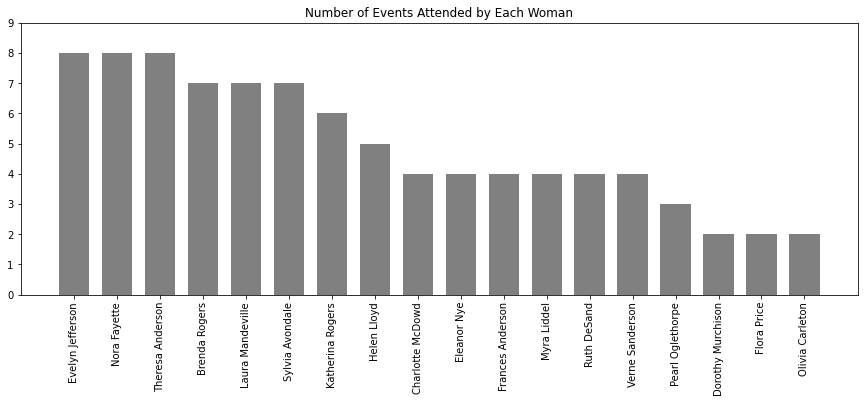

In [20]:
plt.figure(figsize = (15, 5))

plt.bar(c['Woman'], c['Events Attended'], width = 0.7, align = "center", color = 'grey')
plt.xticks(rotation = 90)
plt.yticks(list(range(0, 10)))
plt.title("Number of Events Attended by Each Woman")

plt.axis("on")
plt.show()

It looks like one would need to attend at least 4 events to have a chance to be on the periphery of the most connected women (and those most-connected women are attending at least 6 events)

### Events
Now we will look at the projected graph for the events. We;ll start with looking at each event's degree:


In [21]:
ed = pd.DataFrame(sorted(nx.degree(E), key = lambda x: x[1], reverse=True), columns=['Event','Degree'])
ed

,Event,Degree
0,E6,13
1,E7,13
2,E8,13
3,E9,13
4,E1,8
5,E2,8
6,E3,8
7,E4,8
8,E5,8
9,E10,8


The degree measure, here, represents the number of events where an attendee was also at another event. In other words, an edge reflects some level of "common-ness" in attendee lists. The weight would distinguish how strong that link is (i.e. how many attendees are in common).

In [22]:
# Compute centrality measures for women
ec = pd.DataFrame(nx.closeness_centrality(E).items(), columns=['Event','Closeness Centrality'])
eb = pd.DataFrame(nx.betweenness_centrality(E).items(), columns=['Event','Betweenness Centrality'])
ee = pd.DataFrame(nx.eigenvector_centrality(E).items(), columns=['Event','Eigen Centrality'])

# Display all measures
data_frames = [ed, ec, eb, ee]
emeasures = reduce(lambda left,right: pd.merge(left,right,on=['Event']), data_frames)

emeasures

,Event,Degree,Closeness Centrality,Betweenness Centrality,Eigen Centrality
0,E6,13,1.000000,0.080128,0.339336
1,E7,13,1.000000,0.080128,0.339336
2,E8,13,1.000000,0.080128,0.339336
3,E9,13,1.000000,0.080128,0.339336
4,E1,8,0.722222,0.000000,0.232251
5,E2,8,0.722222,0.000000,0.232251
6,E3,8,0.722222,0.000000,0.232251
7,E4,8,0.722222,0.000000,0.232251
8,E5,8,0.722222,0.000000,0.232251
9,E10,8,0.722222,0.000000,0.232251


We will use the same island$^1$ method as we did for the women above to see if there are isolated circles of events.

In [23]:
n = net.Network(height = "800px", width = "100%", notebook = True,
               heading = 'Network - Events (weights > 4)', directed = False)
n.add_nodes(E.nodes())
for u,v,d in E.edges(data=True):
    if d['weight'] > 4:
        n.add_edge(u,v,value=d['weight'])

n.show("graph.html")

Looking at connections between events where the guest lists contain at least 5 common attendees (weight > 4), we see that there may be some similarity between them. Perhaps they represent more popular events that hardly anyone ever misses?

In [24]:
attendees = [(v, u) for u,v in G.edges() if v in events and u in women]
c = pd.DataFrame.from_dict(Counter(elem[0] for elem in attendees),orient='index').reset_index()
c = c.rename(columns={'index':'Event', 0:'Attendees'})
c = c.sort_values(by=['Attendees','Event'], ascending = [False,True])
print(c)

   Event  Attendees
6     E8         14
7     E9         12
8     E7         10
4     E5          8
5     E6          8
9    E12          6
2     E3          6
10   E10          5
13   E11          4
3     E4          4
0     E1          3
11   E13          3
12   E14          3
1     E2          3


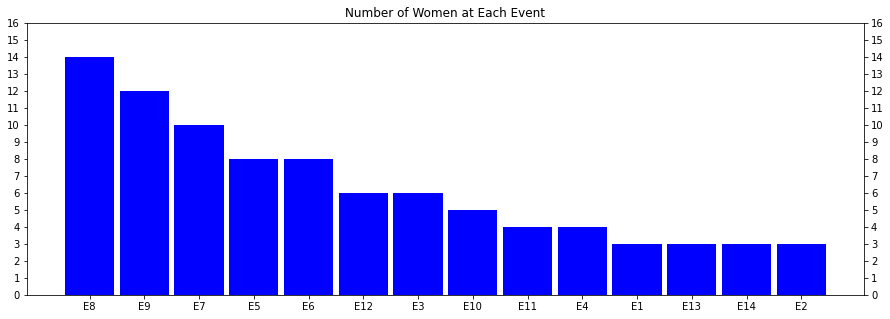

In [25]:
plt.figure(figsize = (15, 5))
plt.bar(c['Event'], c['Attendees'], width = 0.9, align = "center", color = 'blue')
plt.yticks(list(range(0, 17)))
plt.tick_params(labelright = True, right = True)
plt.title("Number of Women at Each Event")

plt.axis("on")
plt.show()

Judging by the number of attendees at each event, it seems that this is the case. The more heavily-attended events are the ones which have greater overlap in their attendee lists. Perhaps these are indeed the "must attend" events.

## Works Cited

1 - Tsvetovat, M., & Kouznetsov, A. (2011). Social Network Analysis for Startups: Finding connections on the social web. Sebastopol, CA: O'Reilly Media.

## Video Presentation

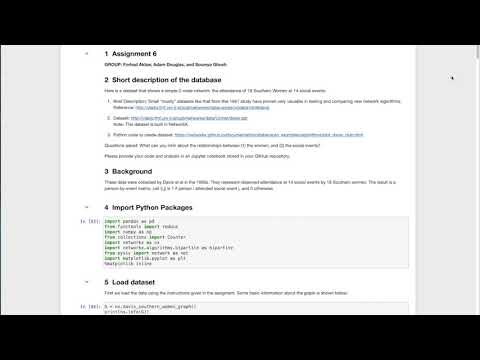

In [26]:
from IPython.display import YouTubeVideo

YouTubeVideo('vjh9hoDheiM', width=800, height=600)